## JASMIN 

Data (e.g. climate model, ERA-Interim) lives here. You will need to apply for access to:
* JASMIN login (https://accounts.jasmin.ac.uk/services/login_services/jasmin-login/)
* BAS group workspace (https://accounts.jasmin.ac.uk/services/group_workspaces/bas_climate/)

## Data cleaning

* Example code to download data from JASMIN + data cleaning
https://github.com/risaueno/urban-climate-downloader
  * --> `notebooks/get_cities.ipynb` (automated downloading and cleaning of grid-point data)
  * --> `notebooks/data_cleaning.ipynb` (examples of how I load and clean data)
  
  
* Accessing jupyter notebook on JASMIN from any network
  * I like to set up SSH hopping from the terminal e.g.: 
`ssh -A -Y -L 8888:localhost:8890 jasmin-login1.ceda.ac.uk -t ssh -Y -L 8890:localhost:8891 jasmin-sci1.ceda.ac.uk`
  * This means if you open a jupyter notebook at port 8891 on jasmin-sci1 (by running `jupyter notebook --port=8891`), you can access it from your local browser at `localhost:8888`, regardless of the network you're on.


## Instructions
* Create a new conda environment (/python virtual environment) and activate it
* Fork my repo: https://github.com/risaueno/urban-climate-downloader
* `git clone https://github.com/<your-username>/urban-climate-downloader`
* cd into library and run `pip install -e .` (install dependencies)
* `conda install nb_conda` (allows you to select kernel in specific conda environment)

## Using Xarray

In [12]:
import xarray as xr 
path = '../data/riskindex/netcdf/max_temperature/'

In [13]:
# Load 'observed' temperature
data_era = xr.open_dataarray(path + 'London_ERAI.nc')
data_era

<xarray.DataArray 'MX2T' (time: 13870)>
array([273.09656, 273.35147, 283.5008 , ..., 280.2819 , 284.54987, 285.18195],
      dtype=float32)
Coordinates:
    day_of_year  (time) int64 ...
    surface      float32 ...
    year         (time) int64 ...
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2017-12-31
    lon          float64 ...
    lat          float64 ...
Attributes:
    long_name:     Maximum 2 metre temperature since previous post-processing
    units:         K
    cell_methods:  day_of_year: year: maximum
    city:          London
    rcp:           None
    model_type:    era

In [14]:
# Load climate model temperature
data_gcm = xr.open_dataarray(path + 'London_rcp45.nc')
data_gcm

<xarray.DataArray (time: 25915)>
array([283.577637, 280.271443, 279.143461, ..., 279.336669, 278.550096,
       283.045349])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2050-12-31
    lon      float64 ...
    lat      float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          K
    original_name:  mo: m01s03i236
    cell_methods:   time: maximum
    cell_measures:  area: areacella
    city:           London
    rcp:            rcp45
    model_type:     gcm

## Converting to pandas dataframe

In [15]:
from downloader import dataprocessing
# ERA-Interim
df_era = dataprocessing.da_to_df(data_era)
df_era.head()

,data
time,
1980-01-01,273.096558
1980-01-02,273.351471
1980-01-03,283.500793
1980-01-04,283.673218
1980-01-05,279.352417


In [16]:
# GCM
df_gcm = dataprocessing.da_to_df(data_gcm)
df_gcm.head()

,data
time,
1980-01-01,283.577637
1980-01-02,280.271443
1980-01-03,279.143461
1980-01-04,285.184903
1980-01-05,281.610492


## Plot example

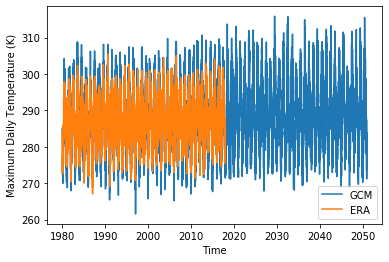

In [17]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(df_gcm.index, df_gcm.data, label='GCM')
plt.plot(df_era.index, df_era.data, label='ERA')
plt.xlabel('Time')
plt.ylabel('Maximum Daily Temperature (K)')
plt.legend()
plt.show()

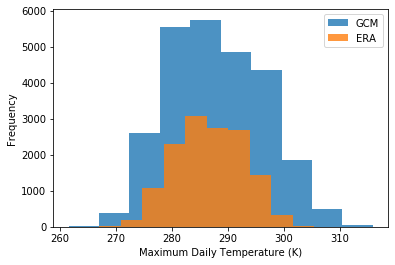

In [24]:
plt.figure()
plt.hist(df_gcm.data, alpha=0.8, label='GCM')
plt.hist(df_era.data, alpha=0.8, label='ERA')
plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (K)')
plt.legend()
plt.show()

### Other data examples (London)

In [8]:
import pandas as pd
df = pd.read_csv('../data/riskindex/other_data_examples/london_Tmax_daily.csv')

# load data from numpy binary
X = df[['arcticT', 'nino3.4', 'NAO', 'QBO', 'lat_of_jet', 'mag_of_jet']]

In [9]:
X.head()

,arcticT,nino3.4,NAO,QBO,lat_of_jet,mag_of_jet
0,248.090063,-0.143465,-0.881458,11.731656,37.543774,8.965073
1,248.620606,-0.319746,-1.424852,11.443148,56.491062,6.947617
2,249.135300,-0.303755,-0.943254,11.374298,43.859547,10.600589
3,249.352215,-0.132075,-0.608684,11.426943,56.491062,10.934588
4,249.831553,-0.051684,1.821504,11.762138,59.999805,15.993987
